In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import multiprocessing
import scipy

In [20]:
minute_pnl_s1 = pd.read_csv('minute_pnl_script1.csv')
minute_pnl_s2 = pd.read_csv('minute_pnl_script2.csv')
minute_pnl_s3 = pd.read_csv('minute_pnl_script3.csv')
minute_pnl_s4 = pd.read_csv('minute_pnl_vol_strat.csv')

In [21]:
minute_pnl_s1.set_index('DateTime', inplace=True)

In [22]:
minute_pnl_s2.set_index('DateTime', inplace=True)

In [23]:
minute_pnl_s3.set_index('DateTime', inplace=True)

In [24]:
minute_pnl_s4.set_index('DateTime', inplace=True)

In [25]:
def plot_pnl(pnl_series):
    fig, ax = plt.subplots(figsize=(20, 6))
    pnl_series.plot(ax=ax)
    ax.set_title('Cumulative PnL')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative PnL')
    ax.grid(True)
    plt.tight_layout()
    plt.show()


In [26]:
def metrics(series, pct=100):
    daily_ret = pct * series.diff()
    annual_mean_return = daily_ret.mean() * 252 * 375
    annual_risk = daily_ret.std() * np.sqrt(252 * 375)
    sharpe_ratio = annual_mean_return / annual_risk

    return {
        'annual_mean_return': annual_mean_return,
        'annual_risk': annual_risk,
        'sharpe_ratio': sharpe_ratio
    }

In [37]:
minute_pnl_s1

,0
DateTime,
2023-01-16 09:16:00,0.000126
2023-01-16 09:17:00,-0.000082
2023-01-16 09:18:00,0.000058
2023-01-16 09:19:00,0.000097
2023-01-16 09:20:00,-0.000024
...,...
2024-07-02 15:26:00,0.093197
2024-07-02 15:27:00,0.093132
2024-07-02 15:28:00,0.093057


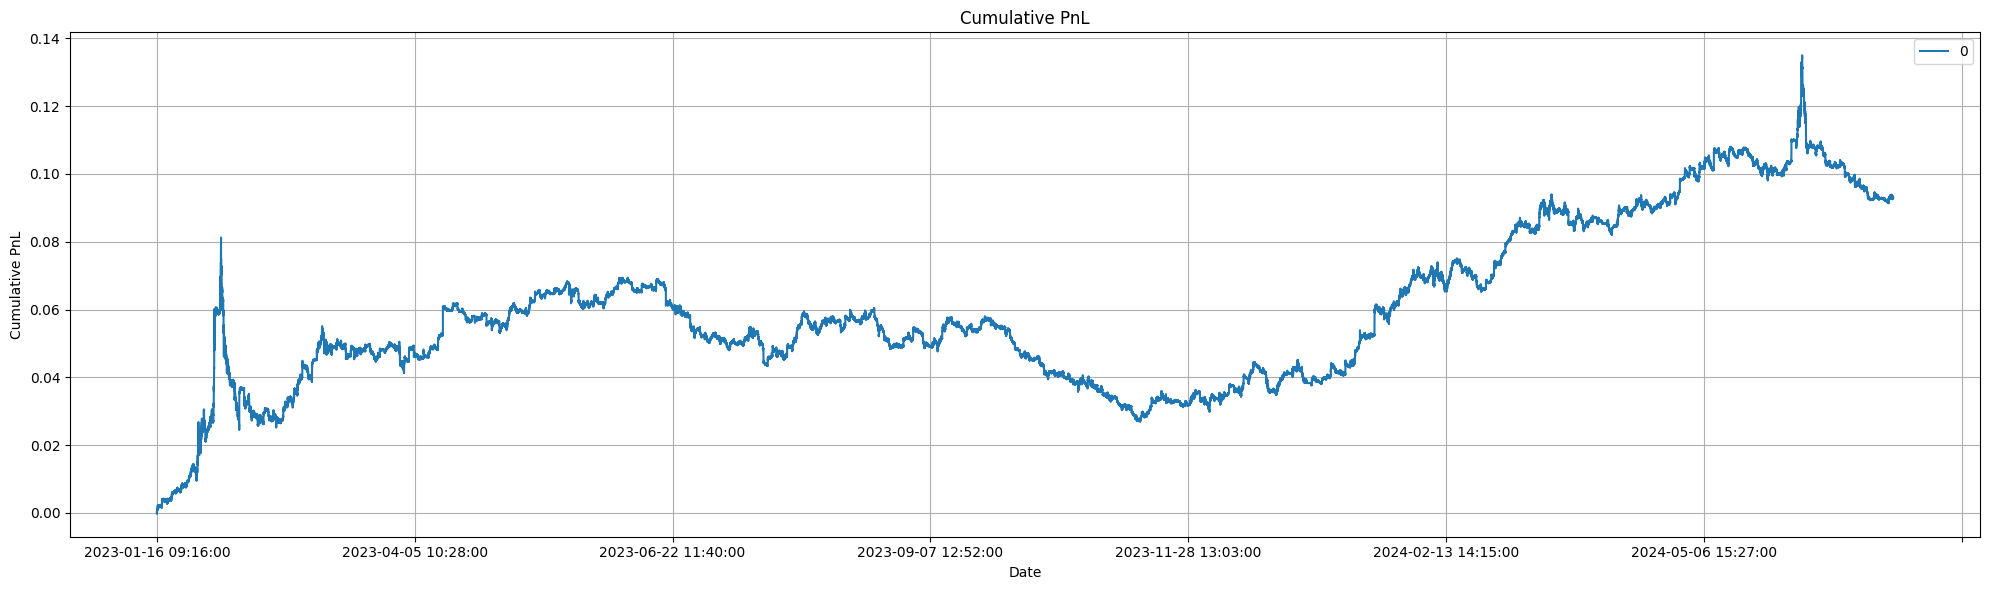

In [27]:
plot_pnl(minute_pnl_s1)

In [28]:
metrics(minute_pnl_s1)

{'annual_mean_return': 0    6.519965
 dtype: float64,
 'annual_risk': 0    4.491293
 dtype: float64,
 'sharpe_ratio': 0    1.45169
 dtype: float64}

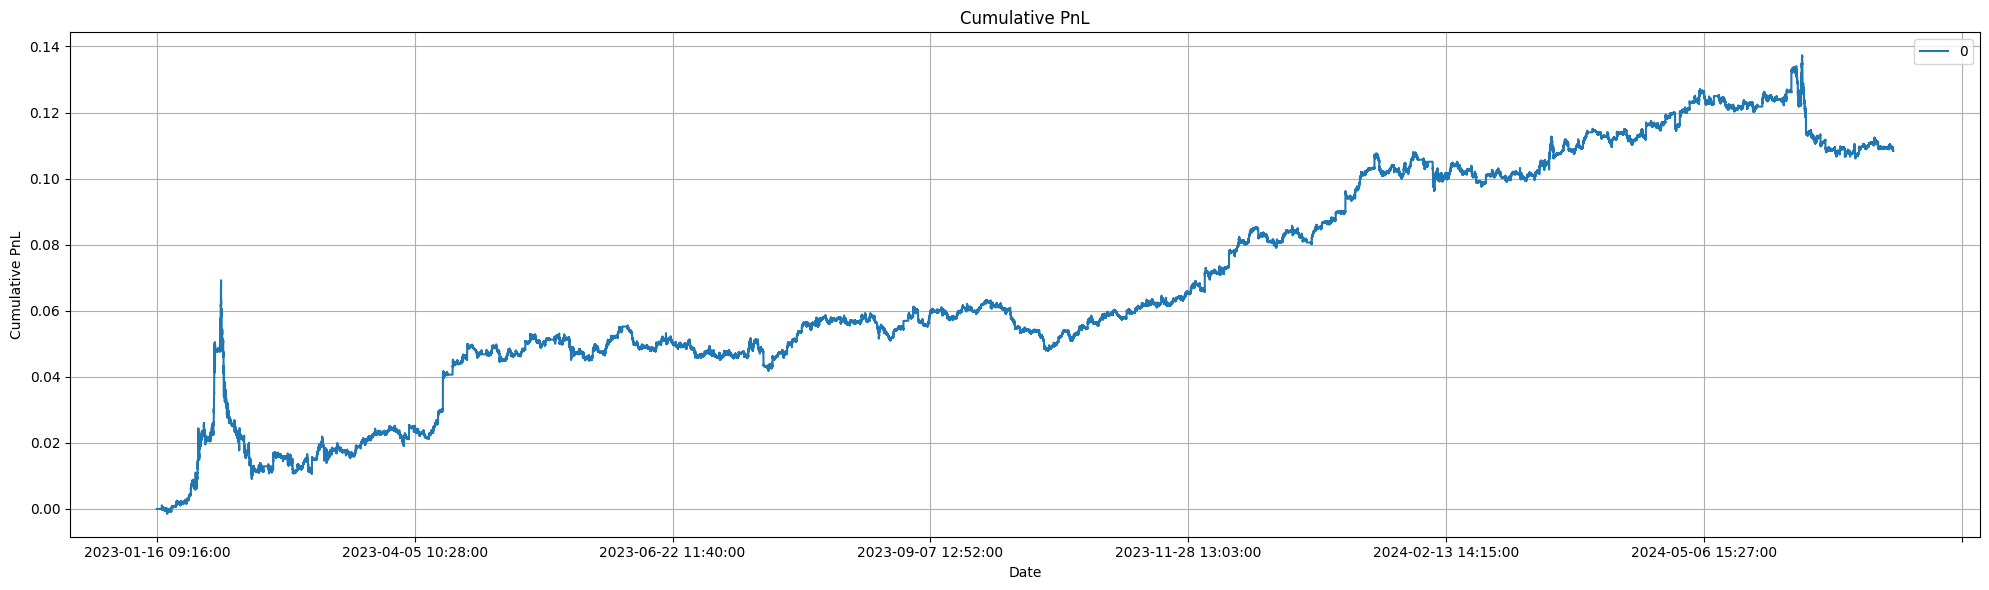

In [29]:
plot_pnl(minute_pnl_s2)

In [30]:
metrics(minute_pnl_s2)

{'annual_mean_return': 0    7.604956
 dtype: float64,
 'annual_risk': 0    4.208048
 dtype: float64,
 'sharpe_ratio': 0    1.807241
 dtype: float64}

In [31]:
minute_pnl_s3

,0
DateTime,
2023-01-16 09:16:00,0.000000
2023-01-16 09:17:00,0.000000
2023-01-16 09:18:00,0.000000
2023-01-16 09:19:00,0.000000
2023-01-16 09:20:00,0.000000
...,...
2024-07-02 15:26:00,0.061550
2024-07-02 15:27:00,0.061482
2024-07-02 15:28:00,0.061428


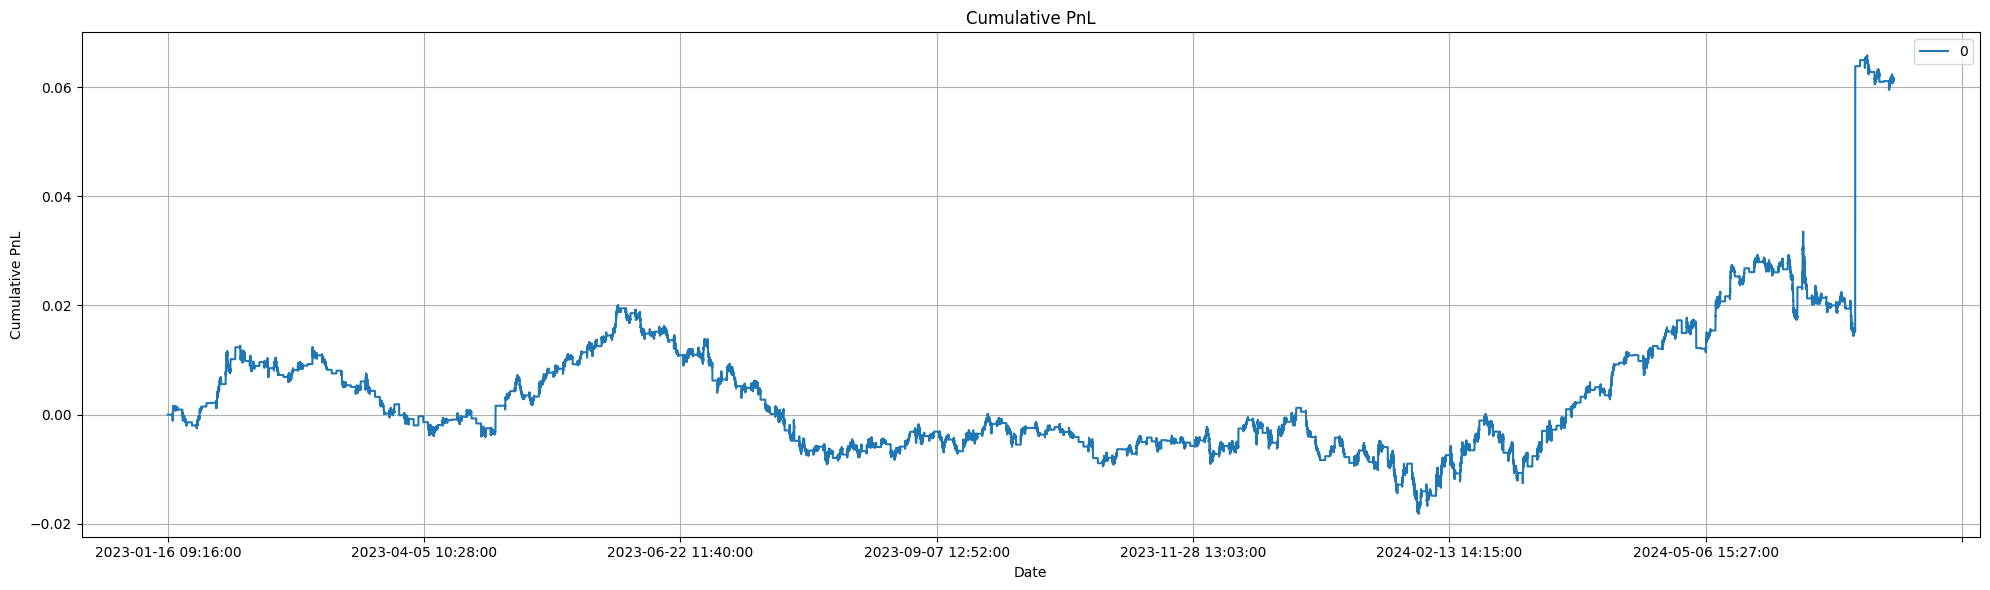

In [32]:
plot_pnl(minute_pnl_s3)

In [33]:
metrics(minute_pnl_s3)

{'annual_mean_return': 0    4.309611
 dtype: float64,
 'annual_risk': 0    4.947148
 dtype: float64,
 'sharpe_ratio': 0    0.87113
 dtype: float64}

In [34]:
minute_pnl_s4

,0
DateTime,
2023-01-16 09:16:00,0.000000
2023-01-16 09:17:00,0.000000
2023-01-16 09:18:00,0.000000
2023-01-16 09:19:00,0.000000
2023-01-16 09:20:00,0.000000
...,...
2024-07-02 15:26:00,0.078292
2024-07-02 15:27:00,0.078306
2024-07-02 15:28:00,0.078306


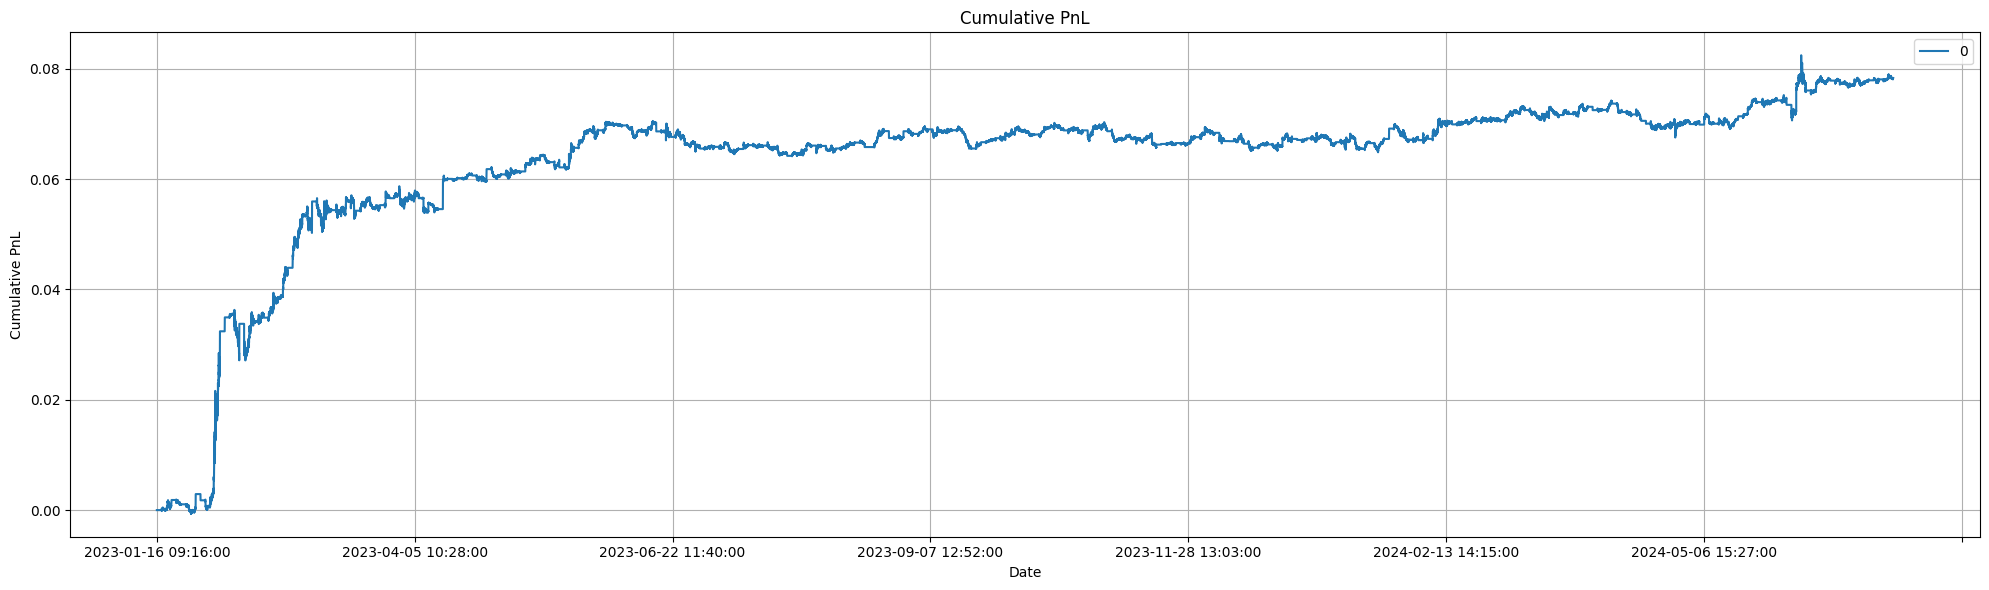

In [35]:
plot_pnl(minute_pnl_s4)

In [36]:
metrics(minute_pnl_s4)

{'annual_mean_return': 0    5.494264
 dtype: float64,
 'annual_risk': 0    2.33415
 dtype: float64,
 'sharpe_ratio': 0    2.353861
 dtype: float64}